In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords import iter_subplots, save, load, IterCellPlot, AutoIterCellPlot, CellListPlot, CellPlot
from colicoords.config import cfg
import numpy as np
import tifffile

# Cy3B-NHS

In [48]:
cells = load('Cy3B_NHS/cells_raw.hdf5')
len(cells)

2519

First, we optimize the cells based on the binary image

In [4]:
res = cells.optimize_mp()

In [5]:
obj_vals = np.array([r.objective_value for r in res])

We can histogram the objective values of the fit, large values are an indication of the cells being badly segmented or the binary image might be of two cells just after division.

<IPython.core.display.Javascript object>


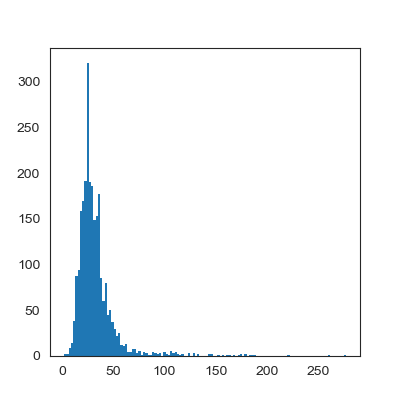

In [13]:
plt.figure(figsize=(4,4))
h = plt.hist(obj_vals, bins='fd', linewidth=0)

Using ``AutoIterCellPlot`` we can quicly inspect the cells with a high objective value.

<IPython.core.display.Javascript object>


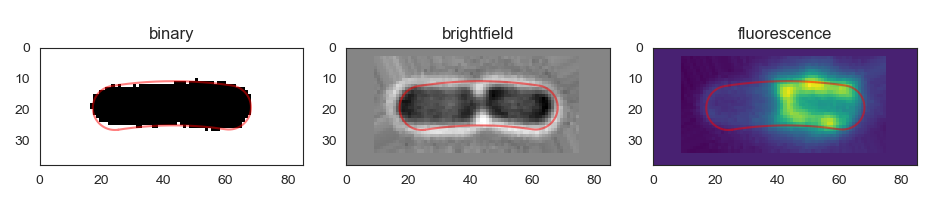

In [11]:
b = obj_vals > 60
aicp = AutoIterCellPlot(cells[b])
aicp.plot()

We use numpy-style boolean indexing to remove the outlying cells:

In [14]:
cells_obj = cells[~b].copy()

In the next step, the coordinate system optimized based on the brightfield image. By using ``optimize_mp`` the workload is spread over all available CPU cores.

In [15]:
res = cells_obj.optimize_mp('brightfield')

We can make another plot of the resulting objective values:

In [18]:
obj_vals = np.array([r.objective_value for r in res])

<IPython.core.display.Javascript object>


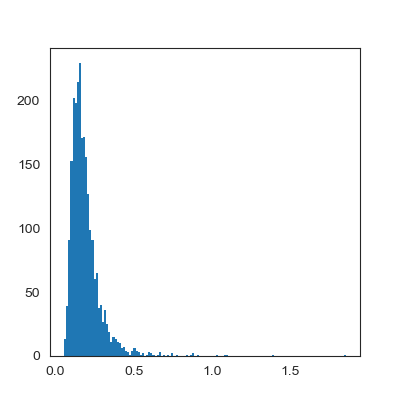

In [40]:
gof = obj_vals / cells_obj.area
plt.figure(figsize=(4,4))
h = plt.hist(obj_vals, bins='fd', linewidth=0)

In [63]:
b = obj_vals > 0.5

In [44]:
cell_obj_bf = cells_obj[~b]
len(cell_obj_bf)

2353

In [5]:
cell_obj_bf = load('Cy3B_NHS/cells_final - Copy.hdf5')
len(cell_obj_bf)

2353

Next, we use the ``measure_r`` to find measure for the radius of the cell. Here, we define the midpoint of the radial distribution of the brightfield image as the radius. This process is demonstrated below.

<IPython.core.display.Javascript object>


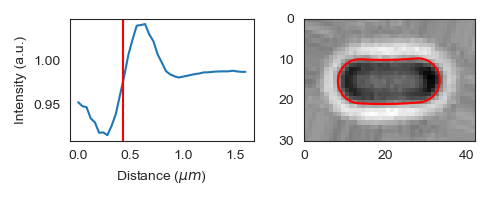

In [16]:
cell = cell_obj_bf[0]
cell.measure_r('brightfield', mode='mid')
cp = CellPlot(cell)
fig, axes = plt.subplots(1, 2, figsize=(5,2))

cp.plot_r_dist(data_name='brightfield', ax=axes[0])
axes[0].axvline(cell.radius * cfg.IMG_PIXELSIZE / 1000, color='r')
cp.imshow('brightfield', ax=axes[1])
cp.plot_outline(ax=axes[1])
plt.tight_layout()

In [75]:
cell_obj_bf.measure_r('brightfield', mode='mid')

Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution not monotonically increasing
Radial distribution 

Some of the brightfield radial distributions are not monotonically increasing between the minimum and maximum point and raise a warning. We check the result by histogramming the radius values and then discard outliers.

<IPython.core.display.Javascript object>


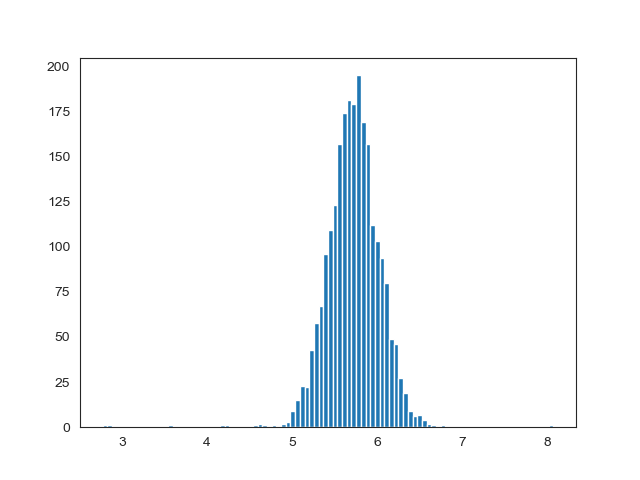

In [78]:
plt.figure()
h = plt.hist(cell_obj_bf.radius, bins='fd')

In [89]:
b = (cell_obj_bf.radius > 4.8) * (cell_obj_bf.radius < 6.7)

To quickly visualize the final selected and coordinate optimized cells:

<IPython.core.display.Javascript object>


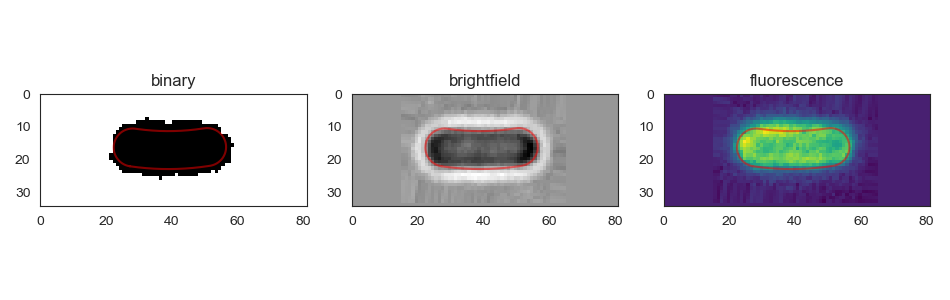

In [90]:
aicp = AutoIterCellPlot(cell_obj_bf[b])
aicp.plot()

In [91]:
save('Cy3B_NHS/cells_final.hdf5', cell_obj_bf[b])

<IPython.core.display.Javascript object>


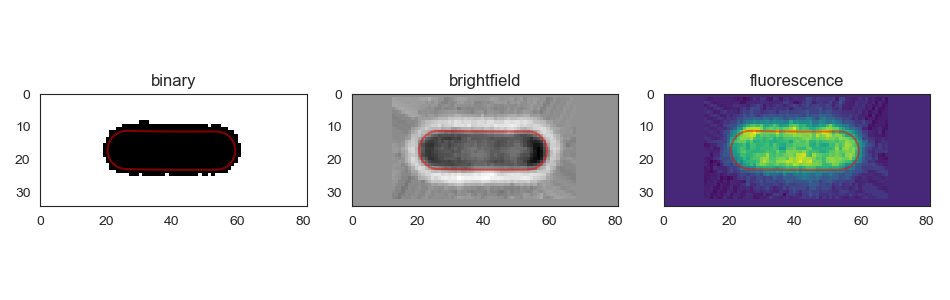

In [76]:
aicp = AutoIterCellPlot(cell_obj_bf)
aicp.plot()

# eGFP

In [49]:
cells = load('eGFP/cells_raw.hdf5')
len(cells)

1741

In [50]:
res = cells.optimize_mp()

In [51]:
obj_vals = np.array([r.objective_value for r in res])

<IPython.core.display.Javascript object>


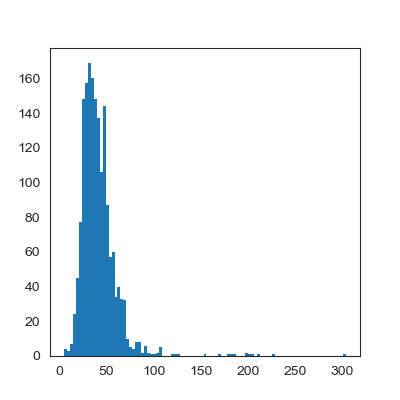

In [52]:
plt.figure(figsize=(4,4))
h = plt.hist(obj_vals, bins='fd', linewidth=0)

<IPython.core.display.Javascript object>


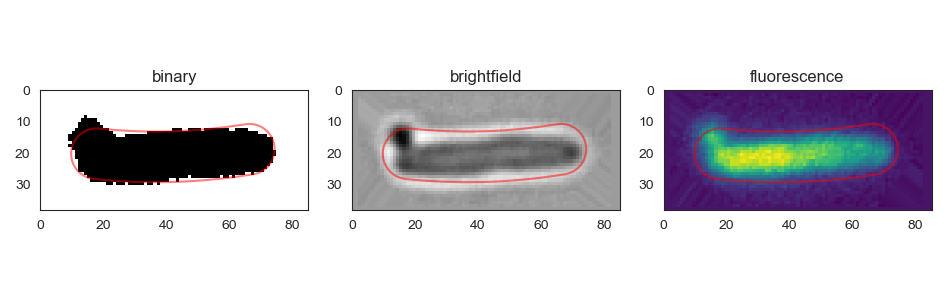

In [53]:
b = obj_vals > 90
aicp = AutoIterCellPlot(cells[b])
aicp.plot()

In [55]:
cells_obj = cells[~b].copy()

In [58]:
res = cells_obj.optimize_mp('brightfield')

In [59]:
obj_vals = np.array([r.objective_value for r in res])

<IPython.core.display.Javascript object>


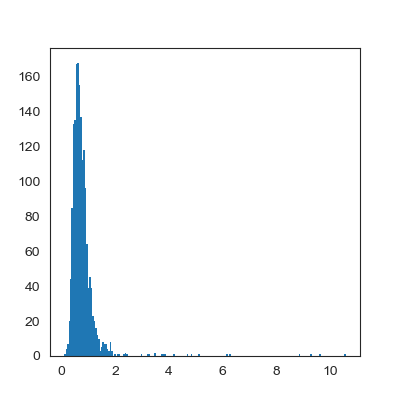

In [60]:
gof = obj_vals / cells_obj.area
plt.figure(figsize=(4,4))
h = plt.hist(obj_vals, bins='fd', linewidth=0)

In [65]:
b = obj_vals > 2

In [66]:
cell_obj_bf = cells_obj[~b]
len(cell_obj_bf)

1698

In [67]:
save('eGFP/cells_final.hdf5', cell_obj_bf)

In [19]:
cell_obj_bf.measure_r('brightfield', mode='mid')

<IPython.core.display.Javascript object>


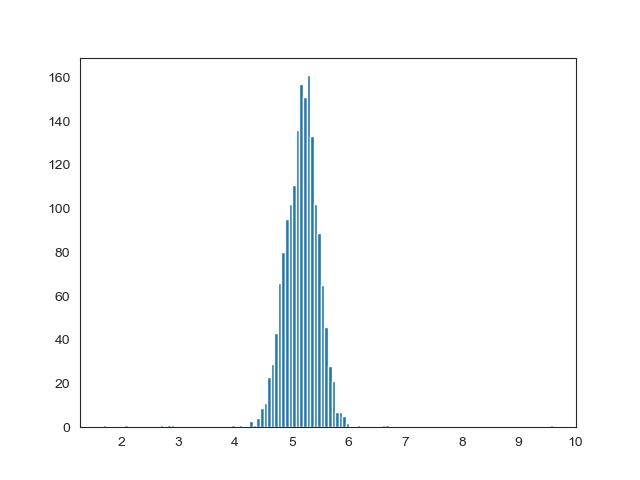

In [20]:
plt.figure()
h = plt.hist(cell_obj_bf.radius, bins='fd')

In [96]:
b = (cell_obj_bf.radius > 3.85) * (cell_obj_bf.radius < 6.7)

In [101]:
sum(b), len(cell_obj_bf)

(1691, 1698)

<IPython.core.display.Javascript object>


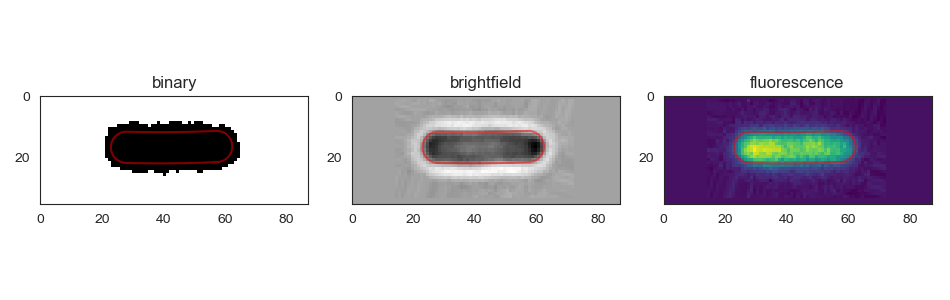

In [98]:
aicp = AutoIterCellPlot(cell_obj_bf[b])
aicp.plot()

In [102]:
save('eGFP/cells_final.hdf5', cell_obj_bf[b])